# Image to Text Experimentation - LLaVA, BLIP-2 (Huggingface)
Rejoice Hu, 2024

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LLaVA
https://colab.research.google.com/drive/1qsl6cd2c8gGtEW1xV5io7S8NHh-Cp1TV?usp=sharing#scrollTo=6Bx8iu9jOssW
https://huggingface.co/docs/transformers/en/model_doc/llava
https://github.com/NielsRogge/Transformers-Tutorials/blob/master/LLaVa/Inference_with_LLaVa_for_multimodal_generation.ipynb

In [3]:
!pip install -q -U transformers #==4.37.2
!pip install -q bitsandbytes accelerate #==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 7.2 MB/s eta 0:00:00


In [1]:
import requests
from PIL import Image

import torch
from transformers import BitsAndBytesConfig, pipeline
# from transformers import AutoModelForVision2Seq

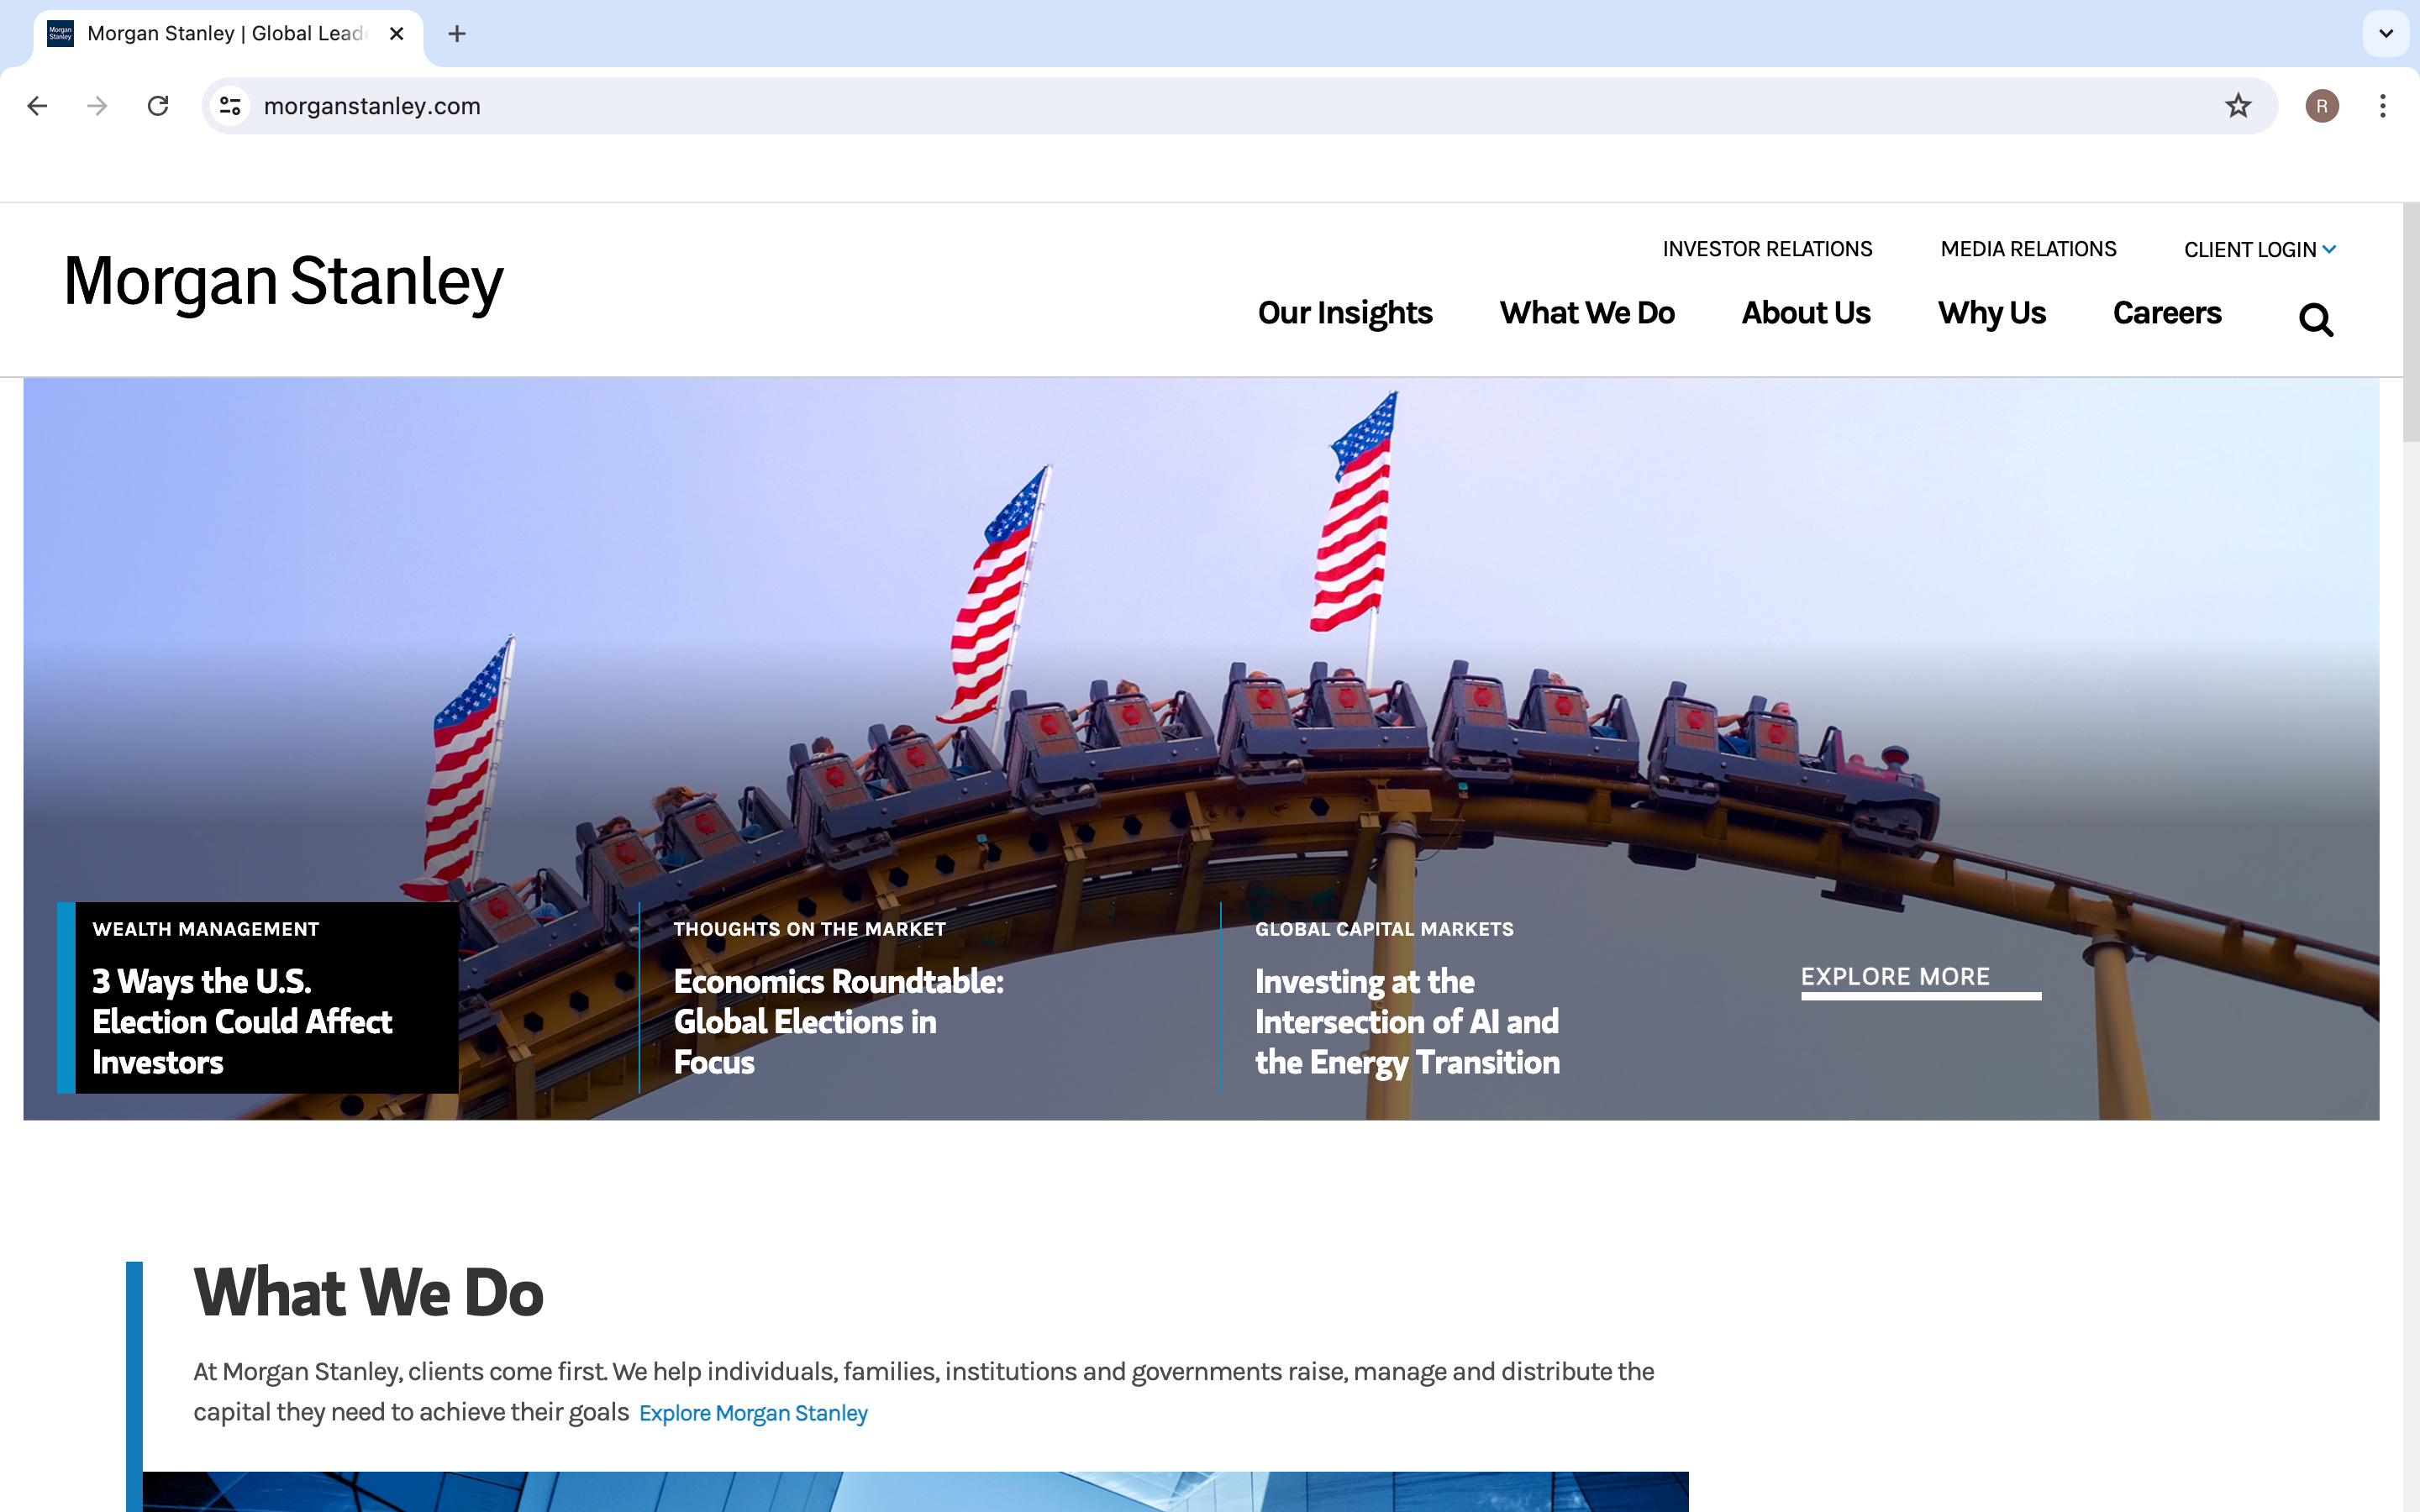

In [ ]:
image = Image.open(r"/content/drive/MyDrive/MultiModalExperimentation/ms_welcome.png")
image

In [5]:
# Set up quantization to load the model in 4-bit precision
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

## llava-1.5-7b-hf

In [ ]:
# Specify model path from Huggingface
model_id = "llava-hf/llava-1.5-7b-hf"

# Load model using Huggingface image-to-text pipeline
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [ ]:
max_new_tokens = 500
prompt = "USER: <image>\nDescribe this image in as much detail as possible within 3 paragraphs, focusing on the text, structure, position/coordinates, and color of ALL the different elements like text, images, menu items, links, etc.\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
Describe this image in as much detail as possible within 3 paragraphs, focusing on the text, structure, position/coordinates, and color of ALL the different elements like text, images, menu items, links, etc.
ASSISTANT: The image displays a website page with a focus on investment and economics. The page is structured with a prominent banner image featuring a roller coaster, likely representing a fun and exciting investment opportunity. The banner image is positioned at the top left corner of the page.

Below the banner, there is a section titled "Investor Relations," which likely provides information about the company and its investment opportunities. The text is displayed in a light blue color, which adds a touch of elegance to the page. The content of the page is organized in a way that makes it easy for visitors to navigate and find the information they are looking for.


#### ANALYSIS

INACCURATE:
- hallucinations:
    - "Investor Relations," section
- claims text is displayed in a light blue color

OVERALL ANALYSIS:
Not very accurate

POSSIBLE CAUSES:
Prompt engineering, model is too simple, tinker with the way the response is generated (only 1 paragraph here)

### ATTEMPT WITHOUT HUGGINGFACE PIPELINE

In [ ]:
from transformers import AutoProcessor, LlavaForConditionalGeneration

In [ ]:
model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/llava/configuration_llava.py:100: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
prompt = "USER: <image>\nDescribe this image in as much detail as possible within 3 paragraphs, focusing on the text, structure, position/coordinates, and color of ALL the different elements like text, images, menu items, links, etc.\nASSISTANT:"
image = Image.open(r"/content/drive/MyDrive/MultiModalExperimentation/ms_welcome.png")

inputs = processor(text=prompt, images=image, return_tensors="pt")

In [ ]:
# Generate
generate_ids = model.generate(**inputs, max_new_tokens=200)
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

## LLaVA-1.6 (LLaVA-NeXT)
Possible v1.6 models to try:
- https://huggingface.co/llava-hf/llama3-llava-next-8b-hf
- https://huggingface.co/liuhaotian/llava-v1.6-mistral-7b
- https://huggingface.co/llava-hf/llava-v1.6-mistral-7b-hf
- https://huggingface.co/liuhaotian/llava-v1.6-vicuna-7b


- https://huggingface.co/models?search=llava
- https://huggingface.co/collections/liuhaotian/llava-16-65b9e40155f60fd046a5ccf2

In [ ]:
# !huggingface-cli download meta-llama/Meta-Llama-3-8B-Instruct --local-dir meta-llama/Meta-Llama-3-8B-Instruct

In [13]:
image = Image.open(r"/content/drive/MyDrive/Colab Notebooks/MultiModalExperimentation/ms_welcome.png")
image2 = Image.open(r"/content/drive/MyDrive/Colab Notebooks/MultiModalExperimentation/ms_tech.png")

In [6]:
# model_id = "xtuner/llava-llama-3-8b-v1_1-gguf"
model_id = "llava-hf/llava-v1.6-mistral-7b-hf"
# "llava-hf/llama3-llava-next-8b-hf"
# "liuhaotian/llava-v1.6-mistral-7b"
# "liuhaotian/llava-v1.6-vicuna-7b"

In [ ]:
pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
max_new_tokens = 2000
prompt = "USER: <image>\nDescribe this image of a website in as much detail as possible within 3 paragraphs, focusing on the text, structure, position/coordinates, and color of ALL the different elements like text, images, menu items, links, etc.\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": max_new_tokens})

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


In [ ]:
print(outputs[0]["generated_text"])

USER:  
Describe this image of a website in as much detail as possible within 3 paragraphs, focusing on the text, structure, position/coordinates, and color of ALL the different elements like text, images, menu items, links, etc.
ASSISTANT:
The image displays a screenshot of a website, specifically the homepage of Morgan Stanley. The website is structured with a header, main content, and a footer. The header contains the Morgan Stanley logo, a navigation menu, and a search bar. The main content is divided into sections, each with its own heading and subheadings.

The main content section titled "Our Insights" features a large image of a roller coaster with American flags attached to it. This section also includes a subheading that reads "3 Ways the U.S. Election Could Affect Investors."

Below this, there's a section titled "What We Do," which provides a brief overview of Morgan Stanley's services.

The footer of the website contains links to various pages and sections, such as "Career

In [ ]:
prompt2 = """[INST] <image>\n Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step.

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST]"""

outputs = pipe(image, prompt=prompt2, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])

# [HERE, THE MOST ACCURATE ONE BY FAR!!! can read the tinier text!!! :)))]

[INST]  
 Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step. 

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST] The webpage is a screenshot of a website, specifically the homepage of Morgan Stanley. The page is dominated by a large, high-resolution image of a roller coaster with American flags attached to the top. The roller coaster is set against a clear blue sky.

At the top of the page, there is a navigation bar with the following menu items: "Investor Relations," "Media Relations," "Careers," and "Why Us." T

In [ ]:
# TECH IMAGE + LARGER max_new_tokens
max_new_tokens = 3000
prompt2 = """[INST] <image>\n Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step.

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST]"""

outputs = pipe(image2, prompt=prompt2, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])


[INST]  
 Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step. 

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST] The webpage is a screenshot of a website, specifically the homepage of Morgan Stanley. The page is divided into several sections, each with its own content and design elements.

At the top of the page, there is a navigation bar with the following menu items: "Investor Relations," "Media Relations," "Client Login," and "Careers." The navigation bar is dark in color, providing a contrast to the lighter b

In [ ]:
# TECH IMAGE + LARGER max_new_tokens
max_new_tokens = 3000
prompt3 = """[INST] <image>\n Here is a webpage on a website. Please describe this page in as much detail as possible.
[/INST]"""

outputs = pipe(image2, prompt=prompt3, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])


[INST]  
 Here is a webpage on a website. Please describe this page in as much detail as possible.
[/INST] The image displays a webpage from the website "Morgan Stanley". The page is titled "Explore Technology & Disruption" and is part of a section titled "Our Insights". The main content of the page is a section titled "Technology & Disruption" with a subtitle "Retail's Comeback Plan". This section includes a brief description of the retail industry's comeback plan, which involves the use of technology and data analysis to improve the customer experience and drive growth.

Below this, there are two sections titled "Technology & Disruption" and "Convenience is Compelling". The first section provides a brief overview of the technology and disruption that is driving the retail industry's comeback plan. The second section explains how convenience is a key factor in driving consumer spending and how technology is being used to improve convenience.

The page also includes a navigation bar at

In [ ]:
# INCREASE TEMPERATURE:
max_new_tokens = 3000
temperature = 0.7
prompt2 = """[INST] <image>\n Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step.

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST]"""

outputs = pipe(image, prompt=prompt2, generate_kwargs={"max_new_tokens": max_new_tokens, "do_sample": True, "temperature": temperature})
print(outputs[0]["generated_text"])


[INST]  
 Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step. 

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST] The webpage is from a website named "Morgan Stanley". It appears to be a homepage or a landing page for the company's global capital markets division. The webpage is rich with visual elements and text, but I'll describe it in a chronological order from top to bottom.

1. At the very top, there is a navigation bar with the Morgan Stanley logo on the left. The logo is a stylized letter 'M' in a dark colo

In [ ]:
# DECREASE TEMPERATURE:
max_new_tokens = 3000
temperature = 0.1
prompt2 = """[INST] <image>\n Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step.

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST]"""

outputs = pipe(image, prompt=prompt2, generate_kwargs={"max_new_tokens": max_new_tokens, "do_sample": True, "temperature": temperature})
print(outputs[0]["generated_text"])


[INST]  
 Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step. 

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST] The webpage is a screenshot of a website, specifically the homepage of Morgan Stanley. The website is primarily in shades of blue, white, and red, with a large image of a roller coaster with American flags in the background. The text on the page is in English.

At the top of the page, there is a navigation bar with the following menu items: "Investor Relations," "Media Relations," "Careers," and "Why U

In [ ]:
# DECREASE TEMPERATURE:
max_new_tokens = 3000
temperature = 0.05
prompt2 = """[INST] <image>\n Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step.

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST]"""

outputs = pipe(image, prompt=prompt2, generate_kwargs={"max_new_tokens": max_new_tokens, "do_sample": True, "temperature": temperature})
print(outputs[0]["generated_text"])


[INST]  
 Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step. 

Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.
[/INST] The webpage is a screenshot of a website, specifically the homepage of Morgan Stanley. The page is dominated by a large, high-resolution image of a roller coaster with several cars, each carrying a person. The roller coaster is set against a clear blue sky. The cars are painted in the colors of the American flag, with red, white, and blue stripes.

At the top of the page, there is a navigation bar with

In [ ]:
# MULTI-IMAGE FEW-SHOT
max_new_tokens = 3000
# do_sample = True
# temperature = 0.05
prompt3 = """
Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step.
Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.


USER: <image1>
ASSISTANT: <!—Start Description of Banner—>
There is a banner at the top of the entire webpage. On the top left side of the banner, there is large text that reads 'Morgan Stanley' as the logo. On the right hand side of the banner, there are 2 tiers of menus. At the very top right, there is the smaller menu with these items: 'INVESTOR RELATIONS', 'MEDIA RELATIONS', 'CLIENT LOGIN' in all capital letters. The 'CLIENT LOGIN' menu item has a dropdown. Right below this smaller menu is a larger menu with these items: 'Our Insights', 'What We Do', 'About Us', 'Why Us', 'Careers', and a search icon button. All this text is in the color black. The background color of the banner is white. The background color of all the content below the banner is light gray.
<!—End Description of Banner—>

<!—Start Description of Header—>
Below this banner is a very large header with text that reads 'Explore Technology & Disruption Ideas'. The 'Technology & Disruption' part of this text is green and underlined with a dropdown. The other parts of the text are black. The entire header is centered on the page.
<!—Start Description of Header—>

<!—Start Description of Articles List—>
Below this large header is a list of articles. There are 2 articles listed on this page, separated by a horizontal black line. Each article in the list follows the same structure.

The first article contains:
1. A small blue header with text in all caps that reads 'TECHNOLOGY & DISRUPTION’
2. Below that, a slightly larger black header in all caps that reads 'RETAIL’S COMEBACK PLAN'
3. Below that, a date in italicized black font that reads 'Jul 15, 2024'
4. Below that, a description in black text that reads 'Our Retail analyst and U.S. Internet analyst connect the dots on how technology is helping the retail industry to cash in on the future.'
5. On the right-hand side of all this text is a square image and play button in the center of the image, to indicate a video.

The second article contains:
1. A small blue header with text in all caps that reads'TECHNOLOGY & DISRUPTION'
2. Below that, a slightly larger black header in all caps that reads 'CONVENIENCE IS COMPELLING'
3. Below that, a date in italicized black font that reads 'Jun 12, 2024'
4. Below that, a description in black text that reads 'Our U.S. Thematic Strategist explains the premium that consumers will pay for convenience, and what that means for sectors including online retail, dining and package delivery.'
5. On the right-hand side of all this text is another square image and play button in the center of the image, to indicate a video.
<!—End Description of Articles List—>

USER: <image2>
ASSISTANT:
"""

outputs = pipe([image2, image], prompt=prompt3, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])


In [7]:
# FEW SHOT WITH MULTI-IMAGE (INTERLEAVE)

model_id = "llava-hf/llava-interleave-qwen-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/82.6k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/126 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/101 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

In [14]:
max_new_tokens = 3000
# do_sample = True
# temperature = 0.05
prompt3 = """
Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step.
Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.


USER: <image1>
ASSISTANT: <!—Start Description of Banner—>
There is a banner at the top of the entire webpage. On the top left side of the banner, there is large text that reads 'Morgan Stanley' as the logo. On the right hand side of the banner, there are 2 tiers of menus. At the very top right, there is the smaller menu with these items: 'INVESTOR RELATIONS', 'MEDIA RELATIONS', 'CLIENT LOGIN' in all capital letters. The 'CLIENT LOGIN' menu item has a dropdown. Right below this smaller menu is a larger menu with these items: 'Our Insights', 'What We Do', 'About Us', 'Why Us', 'Careers', and a search icon button. All this text is in the color black. The background color of the banner is white. The background color of all the content below the banner is light gray.
<!—End Description of Banner—>

<!—Start Description of Header—>
Below this banner is a very large header with text that reads 'Explore Technology & Disruption Ideas'. The 'Technology & Disruption' part of this text is green and underlined with a dropdown. The other parts of the text are black. The entire header is centered on the page.
<!—Start Description of Header—>

<!—Start Description of Articles List—>
Below this large header is a list of articles. There are 2 articles listed on this page, separated by a horizontal black line. Each article in the list follows the same structure.

The first article contains:
1. A small blue header with text in all caps that reads 'TECHNOLOGY & DISRUPTION’
2. Below that, a slightly larger black header in all caps that reads 'RETAIL’S COMEBACK PLAN'
3. Below that, a date in italicized black font that reads 'Jul 15, 2024'
4. Below that, a description in black text that reads 'Our Retail analyst and U.S. Internet analyst connect the dots on how technology is helping the retail industry to cash in on the future.'
5. On the right-hand side of all this text is a square image and play button in the center of the image, to indicate a video.

The second article contains:
1. A small blue header with text in all caps that reads'TECHNOLOGY & DISRUPTION'
2. Below that, a slightly larger black header in all caps that reads 'CONVENIENCE IS COMPELLING'
3. Below that, a date in italicized black font that reads 'Jun 12, 2024'
4. Below that, a description in black text that reads 'Our U.S. Thematic Strategist explains the premium that consumers will pay for convenience, and what that means for sectors including online retail, dining and package delivery.'
5. On the right-hand side of all this text is another square image and play button in the center of the image, to indicate a video.
<!—End Description of Articles List—>

USER: <image2>
ASSISTANT:
"""

outputs = pipe([image2, image], prompt=prompt3, generate_kwargs={"max_new_tokens": max_new_tokens})
print(outputs[0]["generated_text"])


ValueError: The input provided to the model are wrong. The number of image tokens is 0 while the number of image given to the model is 1. This prevents correct indexing and breaks batch generation.

In [17]:
# # two interleaved images
# prompt = "<|im_start|>user <image><image>\nWhat is the difference between these two images?|im_end|><|im_start|>assistant"
prompt = """
Here is a webpage on a website. Your goal is to describe this webpage to someone who is blind. In as much detail as possible, please describe ALL the components that exist on the webpage, including the text, images, menu items, links, etc. Describe their positions on the webpage, color, etc. For all the text, mention exactly what the text says. Start from the top left of the webpage and work your way down until you reach the end of the webpage, step by step.
Rules: Only describe what you can see, otherwise say you are not sure and move on to the next part of the page.

USER: <image>\n
ASSISTANT: <!—Start Description of Banner—>
There is a banner at the top of the entire webpage. On the top left side of the banner, there is large text that reads 'Morgan Stanley' as the logo. On the right hand side of the banner, there are 2 tiers of menus. At the very top right, there is the smaller menu with these items: 'INVESTOR RELATIONS', 'MEDIA RELATIONS', 'CLIENT LOGIN' in all capital letters. The 'CLIENT LOGIN' menu item has a dropdown. Right below this smaller menu is a larger menu with these items: 'Our Insights', 'What We Do', 'About Us', 'Why Us', 'Careers', and a search icon button. All this text is in the color black. The background color of the banner is white. The background color of all the content below the banner is light gray.
<!—End Description of Banner—>

<!—Start Description of Header—>
Below this banner is a very large header with text that reads 'Explore Technology & Disruption Ideas'. The 'Technology & Disruption' part of this text is green and underlined with a dropdown. The other parts of the text are black. The entire header is centered on the page.
<!—Start Description of Header—>

<!—Start Description of Articles List—>
Below this large header is a list of articles. There are 2 articles listed on this page, separated by a horizontal black line. Each article in the list follows the same structure.

The first article contains:
1. A small blue header with text in all caps that reads 'TECHNOLOGY & DISRUPTION’
2. Below that, a slightly larger black header in all caps that reads 'RETAIL’S COMEBACK PLAN'
3. Below that, a date in italicized black font that reads 'Jul 15, 2024'
4. Below that, a description in black text that reads 'Our Retail analyst and U.S. Internet analyst connect the dots on how technology is helping the retail industry to cash in on the future.'
5. On the right-hand side of all this text is a square image and play button in the center of the image, to indicate a video.

The second article contains:
1. A small blue header with text in all caps that reads'TECHNOLOGY & DISRUPTION'
2. Below that, a slightly larger black header in all caps that reads 'CONVENIENCE IS COMPELLING'
3. Below that, a date in italicized black font that reads 'Jun 12, 2024'
4. Below that, a description in black text that reads 'Our U.S. Thematic Strategist explains the premium that consumers will pay for convenience, and what that means for sectors including online retail, dining and package delivery.'
5. On the right-hand side of all this text is another square image and play button in the center of the image, to indicate a video.
<!—End Description of Articles List—>

USER: <image>\n
ASSISTANT:
"""



# prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

outputs = pipe([image2, image], prompt=prompt, generate_kwargs={"max_new_tokens": 3000})
print(outputs)

ValueError: The input provided to the model are wrong. The number of image tokens is 2 while the number of image given to the model is 1. This prevents correct indexing and breaks batch generation.

# BLIP-2
https://huggingface.co/blog/blip-2#using-blip-2-with-hugging-face-transformers

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-krdwqhvt
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-krdwqhvt
  Resolved https://github.com/huggingface/transformers.git to commit 6fbea6d237cbdfc3c229cdadfa3c968cfb2d5142
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import requests
from PIL import Image

from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

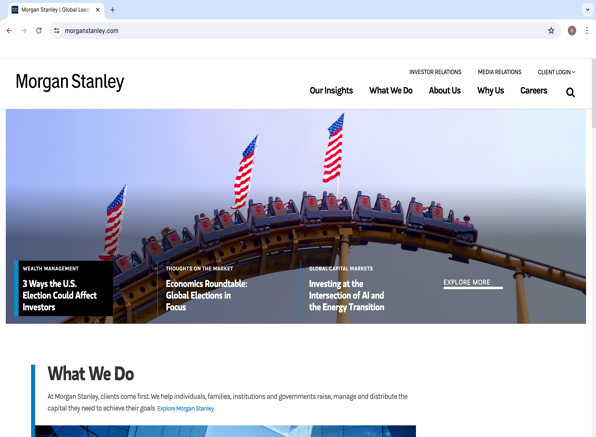

In [ ]:
image = Image.open(r"/content/drive/MyDrive/MultiModalExperimentation/ms_welcome.png")

display(image.resize((596, 437)))

In [ ]:
# Load pre-trained BLIP-2 model and corresponding preprocessor to prepare the inputs
# (For the model: more specifically, a BLIP-2 checkpoint that leverages the pre-trained OPT model by Meta AI, which has 2.7 billion parameters)
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu" # [used T4 GPU]
model.to(device)


Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [ ]:
# Process image input
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

# Generate response / image captioning
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print("GENERATED TEXT: ", generated_text)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Both `max_new_tokens` (=20) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


GENERATED TEXT:  morgan stanley website screenshot


In [ ]:
# Prompted image captioning
prompt = "The items in the menu are"

inputs = processor(image, text=prompt, return_tensors="pt").to(device)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print("GENERATED TEXT: ", generated_text)

GENERATED TEXT:  the same as the ones in the menu on the website


In [ ]:
# ATTEMPT TO LENGTHEN RESPONSE + DETAIL

# prompt = 'To describe this image in as much detail as possible (focusing on the what the texts say, structure, position/coordinates, and color of ALL the different elements like text, images, menu items, links, etc), I would say:'
# prompt = 'Using as much detail as possible, this image describes'

# inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=500, min_length=40)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print("GENERATED TEXT: ", generated_text)

Both `max_new_tokens` (=500) and `max_length`(=51) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


GENERATED TEXT:  morgan stanley website screenshot - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley website design - morgan stanley webs

In [ ]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=500, min_length=40)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print("GENERATED TEXT: ", generated_text)



GENERATED TEXT:  a website page with a picture of a roller coaster and a flag flying in the air on the top of the page, and a text that of the word is not the word is not the word


In [ ]:
# prompt = 'To describe this image in as much detail as possible (focusing on the what the texts say, structure, position/coordinates, and color of ALL the different elements like text, images, menu items, links, etc), I would say:'
prompt = 'Using as much detail as possible, this image describes'

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=500, min_length=40)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print("GENERATED TEXT: ", generated_text)



GENERATED TEXT:  using as much detail as possible, this image describes the website's layout and features, including the american flag and the american flag on the and the american flag of the american flag on the flag


#### ANALYSIS

- The generated outputs are too short and also too vague/not detailed!
-  Seems like BLIP2 is designed to answer queries instead of following instructions. Doesn't seem to work well with system instruction/prompt -- would instruction tuning be effective in yielding better results?

IF I HAD MORE TIME: look into ways to generate a longer and more detailed response using BLIP2/BLIP - https://huggingface.co/docs/transformers/generation_strategies
- preliminary results: text is just being repeated to fill up the required min_length..

# WIP / Attempts (no responses generated)

## BLIP
https://huggingface.co/docs/transformers/en/model_doc/blip
https://github.com/huggingface/notebooks/blob/main/examples/image_captioning_blip.ipynb
https://huggingface.co/Salesforce/blip-image-captioning-base

Ran out of GPU usage with free Google colab. Since BLIP2 is the improved version of BLIP, I assume it would yield less accurate results.

In [ ]:
from transformers import BlipForConditionalGeneration, BlipProcessor

In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda")

## Phi-3-Vision
https://huggingface.co/microsoft/Phi-3-vision-128k-instruct

Ran out of GPU usage with free Google colab

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe = pipeline("text-generation", model="microsoft/Phi-3-vision-128k-instruct", trust_remote_code=True)
pipe(messages)

In [ ]:
# Load model directly
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-vision-128k-instruct", trust_remote_code=True)

In [ ]:
from transformers import AutoModelForCausalLM, AutoProcessor

In [ ]:
# Load model and processor
model_id = "microsoft/Phi-3-vision-128k-instruct"
model = AutoModelForCausalLM.from_pretrained(model_id, device_map="cuda", trust_remote_code=True, torch_dtype="auto", _attn_implementation='flash_attention_2') # use _attn_implementation='eager' to disable flash attention
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

In [ ]:
# prompt = "USER: <image>\nDescribe this image in as much detail as possible within 3 paragraphs, focusing on the text, structure, position/coordinates, and color of ALL the different elements like text, images, menu items, links, etc.\nASSISTANT:"
image = Image.open(r"/content/drive/MyDrive/Morgan Stanley Innovation Side Projects/ms_welcome.png")
# display(image.resize((596, 437)))

messages = [
    {"role": "user", "content": "<image>\nDescribe this image in as much detail as possible within 3 paragraphs, focusing on the text, structure, position/coordinates, and color of ALL the different elements like text, images, menu items, links, etc."},
]

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)


# inputs = processor(text=prompt, images=image, return_tensors="pt")


# messages = [
#     {"role": "user", "content": "<|image_1|>\nWhat is shown in this image?"},
#     {"role": "assistant", "content": "The chart displays the percentage of respondents who agree with various statements about their preparedness for meetings. It shows five categories: 'Having clear and pre-defined goals for meetings', 'Knowing where to find the information I need for a meeting', 'Understanding my exact role and responsibilities when I'm invited', 'Having tools to manage admin tasks like note-taking or summarization', and 'Having more focus time to sufficiently prepare for meetings'. Each category has an associated bar indicating the level of agreement, measured on a scale from 0% to 100%."},
#     {"role": "user", "content": "Provide insightful questions to spark discussion."}
# ]

# url = "https://assets-c4akfrf5b4d3f4b7.z01.azurefd.net/assets/2024/04/BMDataViz_661fb89f3845e.png"
# image = Image.open(requests.get(url, stream=True).raw)


In [ ]:
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

In [ ]:

generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

print(response)

## LLAVA Template

In [ ]:
%cd /content
!git clone -b v1.0 https://github.com/camenduru/LLaVA
%cd /content/LLaVA
!pip install -q gradio .

/content
fatal: destination path 'LLaVA' already exists and is not an empty directory.
/content/LLaVA
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.18.0 requires torch>=2.3.0, but you have torch 2.0.1 which is incompatible.


In [ ]:
# prompt: upgrade torch version to 2.3.0

!pip install torch==2.3.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.0.0
    Uninstalling triton-2.0.0:
      Successfully uninstalled triton-2.0.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1
    Uninstalling torch-2.0.1:
      Successfully uninstalled torch-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llava 1.1.1 requires torch==2.0.1, but you have torch 2.3.0 which is incompatible.
torchvision 0.15.2 requires torch==2.0.1, but you have torch 2.3.0 which is incompatible.


In [ ]:
# Importing necessary libraries
from transformers import AutoTokenizer, BitsAndBytesConfig
from llava.model import LlavaLlamaForCausalLM
import torch

[2024-07-12 21:04:03,233] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [ ]:

# Model configuration and initialization
model_path = "4bit/llava-v1.5-13b-3GB"
kwargs = {"device_map": "auto", "load_in_4bit": True, "quantization_config": BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type='nf4')}
model = LlavaLlamaForCausalLM.from_pretrained(model_path, low_cpu_mem_usage=True, **kwargs)
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/33.7k [00:00<?, ?B/s]

pytorch_model-00001-of-00009.bin:   0%|          | 0.00/2.97G [00:00<?, ?B/s]

pytorch_model-00002-of-00009.bin:   0%|          | 0.00/2.93G [00:00<?, ?B/s]

pytorch_model-00003-of-00009.bin:   0%|          | 0.00/2.89G [00:00<?, ?B/s]

pytorch_model-00004-of-00009.bin:   0%|          | 0.00/2.96G [00:00<?, ?B/s]

pytorch_model-00005-of-00009.bin:   0%|          | 0.00/2.89G [00:00<?, ?B/s]

pytorch_model-00006-of-00009.bin:   0%|          | 0.00/2.98G [00:00<?, ?B/s]

pytorch_model-00007-of-00009.bin:   0%|          | 0.00/2.87G [00:00<?, ?B/s]

pytorch_model-00008-of-00009.bin:   0%|          | 0.00/2.89G [00:00<?, ?B/s]

pytorch_model-00009-of-00009.bin:   0%|          | 0.00/2.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

In [ ]:

# Setting up the vision tower
vision_tower = model.get_vision_tower()
if not vision_tower.is_loaded:
    vision_tower.load_model()
vision_tower.to(device='cuda')
image_processor = vision_tower.image_processor


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [ ]:

# Additional imports and configurations
import os
import requests
from PIL import Image
from io import BytesIO
from llava.conversation import conv_templates, SeparatorStyle
from llava.utils import disable_torch_init
from llava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN, DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN
from llava.mm_utils import tokenizer_image_token, get_model_name_from_path, KeywordsStoppingCriteria
from transformers import TextStreamer


In [ ]:

# Function to caption images
def caption_image(image_file, prompt):
    ...
    return image, output

In [ ]:

# Using the function to caption an image
image, output = caption_image('https://llava-vl.github.io/static/images/view.jpg', 'Describe the image and color details.')
print(output)

NameError: name 'image' is not defined

In [ ]:
# [SEE LOCAL JUPYTER NOTEBOOK]

## PHI
(insufficient hardware/specs)

https://towardsdatascience.com/6-real-world-uses-of-microsofts-newest-phi-3-vision-language-model-8ebbfa317fe8

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:25
🔁 Restarting kernel...


In [ ]:
!conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
# !pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu121



Channels:
 - pytorch
 - nvidia
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pytorch
    - pytorch-cuda=12.1
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    blas-2.116                 |              mkl          13 KB  conda-forge
    blas-devel-3.9.0           |   16_linux64_mkl          12 KB  conda-forge
    ca-certificates-2024.7.4   |       hbcca054_0         151 KB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git@60bb571e993b7d73257fb64044726b569fef9403 pillow==10.3.0 chardet==5.2.0 flash_attn==2.5.8 accelerate==0.30.1 bitsandbytes==0.43.1

  Cloning https://github.com/huggingface/transformers.git (to revision 60bb571e993b7d73257fb64044726b569fef9403) to /tmp/pip-req-build-im5j1zta
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-im5j1zta
  Running command git rev-parse -q --verify 'sha^60bb571e993b7d73257fb64044726b569fef9403'
  Running command git fetch -q https://github.com/huggingface/transformers.git 60bb571e993b7d73257fb64044726b569fef9403
  Running command git checkout -q 60bb571e993b7d73257fb64044726b569fef9403
  Resolved https://github.com/huggingface/transformers.git to commit 60bb571e993b7d73257fb64044726b569fef9403
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 81.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... 

In [ ]:
# Example inspired from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct

# Import necessary libraries
from PIL import Image
import requests
from transformers import AutoModelForCausalLM
from transformers import AutoProcessor
from transformers import BitsAndBytesConfig
import torch

# Define model ID
model_id = "microsoft/Phi-3-vision-128k-instruct"

# Load processor
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

# Define BitsAndBytes configuration for 4-bit quantization
nf4_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# Load model with 4-bit quantization and map to CUDA
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="cuda",
    trust_remote_code=True,
    torch_dtype="auto",
    quantization_config=nf4_config,
)

# Define initial chat message with image placeholder
messages = [{"role": "user", "content": "<|image_1|>\nWhat is shown in this image?"}]

# Download image from URL
url = "https://images.unsplash.com/photo-1528834342297-fdefb9a5a92b?ixlib=rb-4.0.3&q=85&fm=jpg&crop=entropy&cs=srgb&dl=roonz-nl-vjDbHCjHlEY-unsplash.jpg&w=640"
image = Image.open(requests.get(url, stream=True).raw)

# Prepare prompt with image token
prompt = processor.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

# Process prompt and image for model input
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")

model-00002-of-00002.safetensors:  52%|#####2    | 1.75G/3.35G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

RuntimeError: FlashAttention only supports Ampere GPUs or newer.

In [ ]:

# Generate text response using model
generate_ids = model.generate(
    **inputs,
    eos_token_id=processor.tokenizer.eos_token_id,
    max_new_tokens=500,
    do_sample=False,
)

# Remove input tokens from generated response
generate_ids = generate_ids[:, inputs["input_ids"].shape[1] :]

# Decode generated IDs to text
response = processor.batch_decode(
    generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]

# Print the generated response
print(response)

In [ ]:
messages = [{"role": "user", "content": "<|image_1|>\nWhat is this image of?"}]
url = "https://i.postimg.cc/q7Wjtj3n/Screenshot-from-2024-05-22-20-56-56.png"

In [ ]:
# prompt: fix the above error

!pip install git+https://github.com/huggingface/transformers.git@60bb571e993b7d73257fb64044726b569fef9403 pillow==10.3.0 chardet==5.2.0 flash_attn==2.5.8 accelerate==0.30.1 bitsandbytes==0.43.1


  Cloning https://github.com/huggingface/transformers.git (to revision 60bb571e993b7d73257fb64044726b569fef9403) to /tmp/pip-req-build-u6rq4c0x
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-u6rq4c0x
  Running command git rev-parse -q --verify 'sha^60bb571e993b7d73257fb64044726b569fef9403'
  Running command git fetch -q https://github.com/huggingface/transformers.git 60bb571e993b7d73257fb64044726b569fef9403
  Running command git checkout -q 60bb571e993b7d73257fb64044726b569fef9403
  Resolved https://github.com/huggingface/transformers.git to commit 60bb571e993b7d73257fb64044726b569fef9403
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
device_map='cuda'